# Import libraries and dataset

## Import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the exercise dataset into a Pandas DataFrame

In [6]:
df = pd.read_csv('../Datasets/FS_features_ABIDE_males_someGlobals.csv')

## Set the default figure size

In [7]:
# Set the default figure size for Matplotlib plots
# This line adjusts the default figure size to (10, 5) inches.

plt.rcParams["figure.figsize"] = (10, 5)

This code uses `plt.rcParams` to modify the default configuration parameters for Matplotlib. In this case, it sets the default figure size for plots to be 10 inches in width and 5 inches in height. This can be particularly useful when you want to ensure a consistent figure size across multiple plots in your code. Adjust the values `(10, 5)` to your preferred dimensions.

# Data representation

## Construct the normal distribution plot

The function `np.random.normal(loc=mean, scale=sd, size=nsample)` generates `nsample` samples from the normal distribution with a mean of `mean` and a standard deviation of `sd`

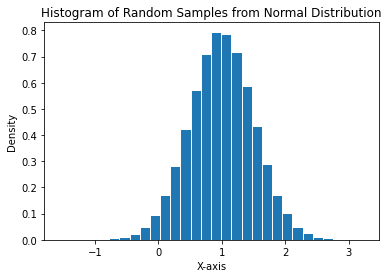

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100,000 random samples from a normal distribution with mean=1, standard deviation=0.5 for x
x = np.random.normal(loc=1, scale=0.5, size=100000)

# Create a histogram of the generated data
# - 'density=True' normalizes the histogram to represent a probability density.
# - 'bins=30' specifies the number of bins in the histogram.
# - 'rwidth=0.9' adjusts the width of the bars for better visualization.
ndist = plt.hist(x, density=True, bins=30, rwidth=0.9)

# Optional: Add labels and title for better plot interpretation
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('Histogram of Random Samples from Normal Distribution')

# Show the plot
plt.show()

This code generates a histogram of 100,000 random samples (`x`) from a normal distribution with a mean of 1 and a standard deviation of 0.5. The `density=True` argument normalizes the histogram to represent a probability density. The histogram is divided into 30 bins (`bins=30`) with adjusted bar widths (`rwidth=0.9`) for better visualization. The resulting plot provides insights into the distribution of the generated random samples.

## Construct a scatter plot from normal distribution with noise

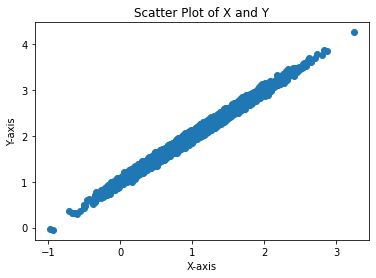

In [9]:
# Generate 10,000 random samples from a normal distribution with mean=1, standard deviation=0.5 for x
x = np.random.normal(loc=1, scale=0.5, size=10000)

# Generate 10,000 random samples from a normal distribution with mean=1, standard deviation=0.05 for y
# Add these values to x, creating a linear relationship with some noise
y = x + np.random.normal(loc=1, scale=0.05, size=10000)

# Create a scatter plot using the generated data points
scplot = plt.scatter(x, y)

# Optional: Add labels and title for better plot interpretation
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of X and Y')

# Show the plot
plt.show()

This code generates a scatter plot where the x-axis values (`x`) follow a normal distribution with a mean of 1 and a standard deviation of 0.5. The y-axis values (`y`) are created by adding a normal distribution with a mean of 1 and a smaller standard deviation of 0.05 to the x-axis values, introducing some noise. The resulting scatter plot visualizes the relationship between `x` and `y`.

## Using seaborn for data representation

Generate a box plot of subjects' age by diagnostic group for the original dataset and for the sample

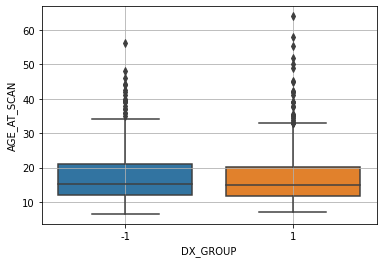

In [10]:
sns_boxplot = sns.boxplot(x='DX_GROUP', y='AGE_AT_SCAN', data=df).grid()

In [11]:
# The 'lambda x: x.split('_')[0]' function splits each 'FILE_ID' value using '_' and takes the first part.

df['Site'] = df.FILE_ID.apply(lambda x: x.split('_')[0])

# Display the first few rows of the DataFrame with the new 'Site' column
df.head()

,FILE_ID,AGE_AT_SCAN,SEX,FIQ,DX_GROUP,lh_MeanThickness,rh_MeanThickness,lhCortexVol,rhCortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,TotalGrayVol,Site
0,Caltech_0051456,55.4,1,126.0,1,2.52039,2.52379,258703.4443,262670.1207,262254.9768,265741.1295,701211.5651,Caltech
1,Caltech_0051457,22.9,1,107.0,1,2.55533,2.56998,321132.1284,317004.7945,304528.2513,301555.0187,841485.9229,Caltech
2,Caltech_0051458,39.2,1,93.0,1,2.64518,2.63160,266418.9917,266456.1701,271683.1723,266494.7088,726728.1619,Caltech
3,Caltech_0051459,22.8,1,106.0,1,2.70814,2.72762,307157.4469,310540.0389,258618.7918,255480.2694,794676.4859,Caltech
4,Caltech_0051461,37.7,1,99.0,1,2.59002,2.61012,263932.5269,269417.2519,242330.5838,232809.9268,714122.7788,Caltech


This code snippet creates a new column `Site` in the DataFrame `df` and displays the first few rows to show the changes. The `Site` column will contain the part of the `FILE_ID` before the first underscore.

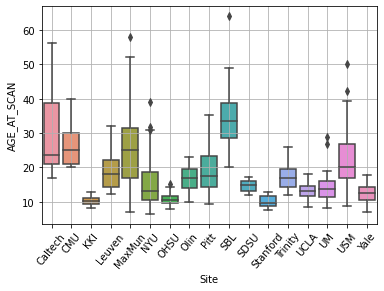

In [12]:
# Creating a boxplot using Seaborn
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=df)

# Setting custom x-axis tick labels using unique values from 'Site' column
# Rotating the labels for better readability
sns_boxplot.set_xticklabels(labels=df.Site.unique(), rotation=50)

# Adding grid lines to the plot
sns_boxplot.grid()

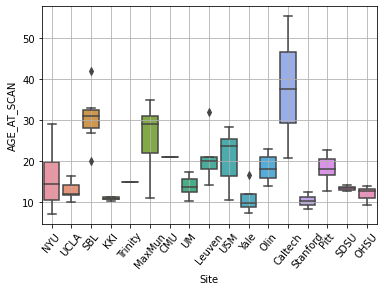

In [15]:
# Sampling 100 random rows with replacement from the DataFrame
sample_data = df.sample(100, replace=True)

# Creating a boxplot using Seaborn with the sampled data
sns_boxplot = sns.boxplot(x='Site', y='AGE_AT_SCAN', data=sample_data)

# Setting custom x-axis tick labels using unique values from 'Site' column
# Rotating the labels for better readability
sns_boxplot.set_xticklabels(labels=sample_data.Site.unique(), rotation=50)

# Adding grid lines to the plot
sns_boxplot.grid()

<AxesSubplot:title={'center':'Number of subjects per site'}, xlabel='Site'>

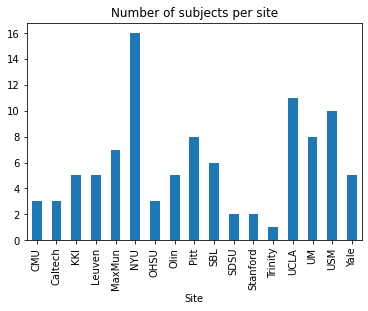

In [19]:
# Grouping the sampled data by 'Site' and counting the number of subjects per site
site_counts_sample = sample_data.groupby('Site')['FILE_ID'].count()

# Creating a bar plot to visualize the number of subjects per site
site_counts_sample.plot(kind='bar', title='Number of subjects per site')